In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
def read_file(filename, name):
    size = []
    time = []
    bandwidth = []
    with open(filename) as file:
        for line in file:
            if line[0:len(name)] == name:
                bois = re.search(r'.*size=\s*(.+?), us=\s*(.+?), bw=\s*(.+?)GB/s', line)
                size.append(bois.group(1))
                time.append(bois.group(2))
                bandwidth.append(bois.group(3))

    data = np.zeros((len(size), 3))
    data[:, 0] = size
    data[:, 1] = time
    data[:, 2] = bandwidth

    df = pd.DataFrame(data)
    df.columns = ['size', 'time', 'bandwidth']

    return df

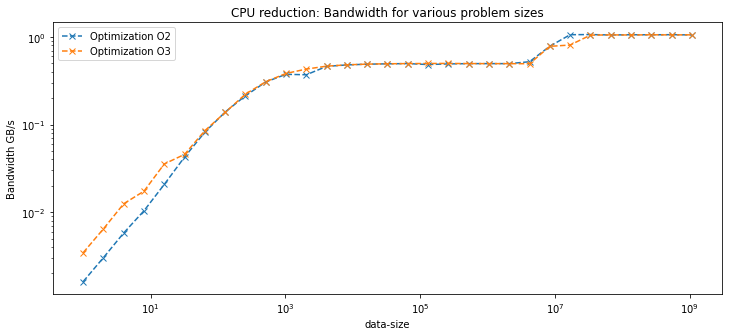

In [15]:
df_cpu_redO2 = read_file('6_2.txt', 'CPU reduction O2:')
df_cpu_redO3 = read_file('6_2.txt', 'CPU reduction O3:')

plt.plot(df_cpu_redO2['size'], df_cpu_redO2['bandwidth'], marker='x', linestyle='--', label=f'Optimization O2')
plt.plot(df_cpu_redO3['size'], df_cpu_redO3['bandwidth'], marker='x', linestyle='--', label=f'Optimization O3')

plt.xlabel('data-size')
plt.ylabel('Bandwidth GB/s')
plt.yscale('log')
plt.xscale('log')
plt.title('CPU reduction: Bandwidth for various problem sizes')
plt.legend()
plt.savefig('cpu_reduction.png')